# Distributed Machine Learing Project

## Loading Libraries

In [1]:
# Importing Libraries



# Basic Libraries #################################################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import datetime



# For Feature Engineering #########################################################################################

# For Plotting Correlation Matrix and Scatter Plot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# PCA - Need the sklearn PCA 
from sklearn.decomposition import PCA

# Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

# Label Encoder
from sklearn.preprocessing import LabelEncoder


# For Machine Learning Techniques #################################################################################

# For Data Anaylsis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# For Linear Regression
from sklearn.linear_model import LinearRegression

# ElasticNet Regression
from sklearn.linear_model import ElasticNet

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# For KNN 
from sklearn.neighbors import KNeighborsRegressor

# For Grid Search
from sklearn.model_selection import GridSearchCV

# For Metrics
from sklearn.metrics import mean_squared_error, r2_score, max_error, mean_absolute_percentage_error



# Personal Preference #############################################################################################
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
# Select dataset below

dataset_file = "C:/Users/prest/OneDrive - Mississippi State University/ML_Project_FA2021/Project Data/vehicles/UsedCars.csv"
#dataset_file = "C:/Users/dhful/OneDrive - Mississippi State University/FA2021/ML_Project_FA2021/Project Data/vehicles/UsedCars.csv"

In [3]:
# Uploading dataset as a Pandas file

df_pd = pd.read_csv(dataset_file)
df_pd.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


## Data Analysis

In [4]:
# Basic Analysis

pd.DataFrame(df_pd.describe())

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [5]:
# Data Types

pd.DataFrame(df_pd.dtypes, columns = ['Data Types'])

,Data Types
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,object
engine,object


In [6]:
# Size of Dataset

df_pd.shape

(8128, 13)

In [7]:
# Cardinality

card = df_pd.apply(pd.Series.nunique)
pd.DataFrame(card, columns = ['Cardinality'])

,Cardinality
name,2058
year,29
selling_price,677
km_driven,921
fuel,4
seller_type,3
transmission,2
owner,5
mileage,393
engine,121


In [8]:
# Missing Values

sum_missing = df_pd.isna().sum()
pct_missing = df_pd.isna().mean()

missing_values = pd.concat([sum_missing, pct_missing], axis = 1)
missing_values = missing_values.reset_index(drop = False)
missing_values = missing_values.rename(columns = {0: 'Number of Missing Values',1: 'Missing Percentage'})
missing_values

,index,Number of Missing Values,Missing Percentage
0,name,0,0.000000
1,year,0,0.000000
2,selling_price,0,0.000000
3,km_driven,0,0.000000
4,fuel,0,0.000000
5,seller_type,0,0.000000
6,transmission,0,0.000000
7,owner,0,0.000000
8,mileage,221,0.027190
9,engine,221,0.027190


## Feature Engineering

In [9]:
# Removing Columns containing too many Missing Values

df_pd2 = df_pd

th = .10
# Defining threshold for cutoff percentage

bad_column = []
for i,r in missing_values.iterrows():
        c = r['index']
        mp = r["Missing Percentage"]
        if mp > th:
            bad_column.append(c)

for i in bad_column:
    for j in df_pd2.columns:
        if j == i:
            df_pd2 = df_pd2.drop(j, axis = 1)
            
print(len(df_pd2.columns))
pd.DataFrame(df_pd2.columns)

13


,0
0,name
1,year
2,selling_price
3,km_driven
4,fuel
5,seller_type
6,transmission
7,owner
8,mileage
9,engine


In [10]:
# One Hot Enconding

df_pd3 = pd.get_dummies(df_pd2, drop_first = True, columns = ['fuel','seller_type','transmission','owner'])
df_pd3.head()

,name,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1,0,0,1,0,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1,0,0,1,0,1,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,0,0,1,1,0,1,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1,0,0,1,0,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,0,0,1,1,0,1,0,0,0,0


In [11]:
# Manually Changing Variables (Adding Age Variable)

today = datetime.date.today().year
df_pd3['Age'] = today - df_pd3.year


df_pd3 = df_pd3.drop(['year','name','engine', 'seats'], axis = 1)

df_pd3.head()

,selling_price,km_driven,mileage,max_power,torque,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,Age
0,450000,145500,23.4 kmpl,74 bhp,190Nm@ 2000rpm,1,0,0,1,0,1,0,0,0,0,7
1,370000,120000,21.14 kmpl,103.52 bhp,250Nm@ 1500-2500rpm,1,0,0,1,0,1,0,1,0,0,7
2,158000,140000,17.7 kmpl,78 bhp,"12.7@ 2,700(kgm@ rpm)",0,0,1,1,0,1,0,0,0,1,15
3,225000,127000,23.0 kmpl,90 bhp,22.4 kgm at 1750-2750rpm,1,0,0,1,0,1,0,0,0,0,11
4,130000,120000,16.1 kmpl,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",0,0,1,1,0,1,0,0,0,0,14


In [12]:
# String Indexer

df_SI = df_pd3

cat_columns = df_SI.select_dtypes(['object'])
cat_columns

#Convert from object type to cat. type
for i in cat_columns:
    df_SI[i] = df_SI[i].astype('category')

# Convert to Encoded values
cat_columns = df_SI.select_dtypes(['category'])
LE = LabelEncoder()
for i in cat_columns:
    df_SI[i] = LE.fit_transform(df_SI[i])
    
df_pd4 = df_SI
df_pd4

,selling_price,km_driven,mileage,max_power,torque,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,Age
0,450000,145500,335,244,178,1,0,0,1,0,1,0,0,0,0,7
1,370000,120000,284,15,260,1,0,0,1,0,1,0,1,0,0,7
2,158000,140000,180,253,66,0,0,1,1,0,1,0,0,0,1,15
3,225000,127000,327,297,224,1,0,0,1,0,1,0,0,0,0,11
4,130000,120000,136,288,21,0,0,1,1,0,1,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,202,267,37,0,0,1,1,0,1,0,0,0,0,8
8124,135000,119000,154,30,250,1,0,0,1,0,1,1,0,0,0,14
8125,382000,120000,222,241,178,1,0,0,1,0,1,0,0,0,0,12
8126,290000,25000,337,232,106,1,0,0,1,0,1,0,0,0,0,8


In [13]:
# Filling in Missing Values

df_pd5 = df_pd4.fillna(df_pd3.median())

#df_pd3.mean()
df_pd5.head(10)

,selling_price,km_driven,mileage,max_power,torque,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,Age
0,450000,145500,335,244,178,1,0,0,1,0,1,0,0,0,0,7
1,370000,120000,284,15,260,1,0,0,1,0,1,0,1,0,0,7
2,158000,140000,180,253,66,0,0,1,1,0,1,0,0,0,1,15
3,225000,127000,327,297,224,1,0,0,1,0,1,0,0,0,0,11
4,130000,120000,136,288,21,0,0,1,1,0,1,0,0,0,0,14
5,440000,45000,246,263,36,0,0,1,1,0,1,0,0,0,0,4
6,96000,175000,168,195,402,0,1,0,1,0,1,0,0,0,0,14
7,45000,5000,136,172,388,0,0,1,1,0,1,0,1,0,0,20
8,350000,90000,338,224,144,1,0,0,1,0,1,0,0,0,0,10
9,200000,169000,244,228,139,1,0,0,1,0,1,0,0,0,0,8


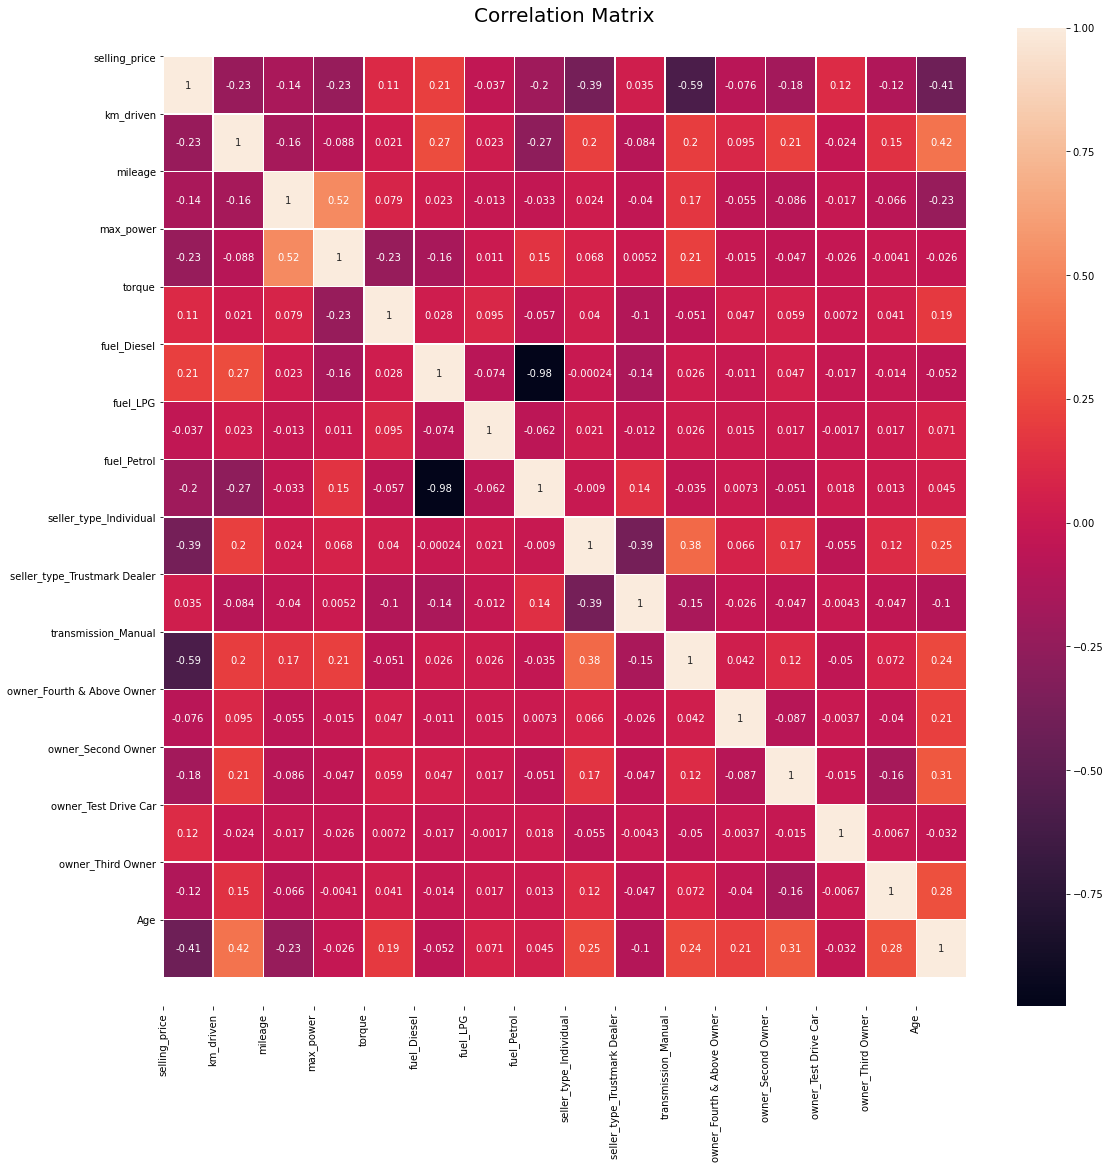

In [14]:
# Heat Map

fr_hm = df_pd5 #For Heat Map

## Determining the relevancy of features using heatmap in calculating the outcome variable
corrmat = fr_hm.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(18,18))

#Plotting heat map
g=sns.heatmap(fr_hm[top_corr_features].corr(),annot=True,linewidths=.5)
b, t = plt.ylim() 
b += 0.5
t -= 0.5 
plt.ylim(b, t)
plt.title('Correlation Matrix',fontdict = {'fontsize' : 20})
plt.xticks(range(len(fr_hm.columns)), fr_hm.columns, rotation=90)
plt.yticks(range(len(fr_hm.columns)), fr_hm.columns)
plt.gca().xaxis.tick_bottom()
plt.show()

## Machine Learning Techniques

### Splitting the Data

In [15]:
# Splitting the Data


target_variable_name = 'selling_price'

# Setting the pre-proccessed dataframe
df_datasplit = df_pd5

X = df_datasplit.drop(target_variable_name, axis = 1)
y = df_datasplit.iloc[:,:1]

#Scaling X Values
Scaler = MinMaxScaler()
X_Scaled = pd.DataFrame(Scaler.fit_transform(X),columns = X.columns).set_index(X.index)

X_train,X_test,y_train,y_test = train_test_split(X_Scaled,y,test_size = 0.2, random_state = 42)

In [16]:
# Creating Results List

Train_score = []
Test_score = []

r2 = []
PCT_ME = []

### Simple Linear Regression

In [17]:
# Simple Linear Regression


import time
start_time = time.time()

# Running Model
lregressor1 = LinearRegression()
lregressor1.fit(X_train, y_train)

# Predicting
y_pred_LR = lregressor1.predict(X_test)

stop_time = time.time() - start_time
print(f'Run Time: {stop_time}')

Run Time: 0.031256914138793945


In [18]:
# Results for Simple Linear Regression

r2_LR = r2_score(y_test,y_pred_LR) 
r2.append(r2_LR)

E1 = round(mean_absolute_percentage_error(y_test,y_pred_LR),4)
PCT_ME.append(E1)

Train_Score_LR = lregressor1.score(X_train,y_train)*100
Train_score.append(Train_Score_LR)
print("Trainning Score is {}".format(Train_Score_LR))

Test_Score_LR = lregressor1.score(X_test,y_test)*100
Test_score.append(Test_Score_LR)
print("Testing Score is {}".format(Test_Score_LR))

Trainning Score is 54.43888015513091
Testing Score is 53.47759239123944


### Elastic Net Linear Regression

In [19]:
# Elastic Net


import time
start_time = time.time()

params_EN = {'alpha': [0,.25,.4,.5,.6,.75,1], 'l1_ratio': [0,.2,.4,.6,.8,1]}

# Running Model
elasticnetregressor = GridSearchCV(ElasticNet(random_state = 42),params_EN)
elasticnetregressor.fit(X_train, y_train)
print(elasticnetregressor.best_score_)
print(elasticnetregressor.best_params_)

# Predicting
y_pred_EN = elasticnetregressor.predict(X_test)

stop_time = time.time() - start_time
print(f'Run Time: {stop_time}')

0.5354107254413362
{'alpha': 1, 'l1_ratio': 1}
Run Time: 5.316779613494873


In [20]:
# Results for Elastic Net

r2_EN = r2_score(y_test,y_pred_EN) 
r2.append(r2_EN)

E2 = round(mean_absolute_percentage_error(y_test,y_pred_EN),4)
PCT_ME.append(E2)

Train_Score_EN = elasticnetregressor.score(X_train,y_train)*100
Train_score.append(Train_Score_EN)
print("Trainning Score is {}".format(Train_Score_EN))

Test_Score_EN = elasticnetregressor.score(X_test,y_test)*100
Test_score.append(Test_Score_EN)
print("Testing Score is {}".format(Test_Score_EN))

Trainning Score is 54.43887933212099
Testing Score is 53.47688071291661


### K-Nearest Neighbor Regressor

In [21]:
# Running K-Nearest Neighbors

import time
start_time = time.time()

params_KNN = {'n_neighbors': [2,5,10,15,25,50], 'weights': ['uniform','distance'], 'leaf_size': [10,20,30,40,50]}

# Running Model
knn = GridSearchCV(KNeighborsRegressor(), params_KNN)
knn.fit(X_train, y_train)
print(knn.best_score_)
print(knn.best_params_)
    
# Predicting
y_pred_KNN = knn.predict(X_test)

stop_time = time.time() - start_time
print(f'Run Time: {stop_time}')

0.9373864219689454
{'leaf_size': 20, 'n_neighbors': 5, 'weights': 'distance'}
Run Time: 16.092169046401978


In [22]:
# Results for KNN

r2_KNN = r2_score(y_test,y_pred_KNN) 
r2.append(r2_KNN)

E3 = round(mean_absolute_percentage_error(y_test,y_pred_KNN),4)
PCT_ME.append(E3)

Train_Score_KNN = knn.score(X_train,y_train)*100
Train_score.append(Train_Score_KNN)
print("Trainning Score is {}".format(Train_Score_KNN))

Test_Score_KNN = knn.score(X_test,y_test)*100
Test_score.append(Test_Score_KNN)
print("Testing Score is {}".format(Test_Score_KNN))

Trainning Score is 99.95901283443716
Testing Score is 96.01353201371657


### Random Forest Regressor

In [23]:
# Random Forest Regression

start_time = time.time()

# Running Model
params = {'n_estimators':[25,50,75,100],'max_depth':[2,3,4,5], 'max_features':['auto','sqrt','log2']}
reg = GridSearchCV(RandomForestRegressor(),params).fit(X_train,y_train)
print(reg.best_score_)
print(reg.best_params_)

# Predicting
y_pred_RF = reg.predict(X_test)

stop_time = time.time() - start_time
print(f'Run Time: {stop_time}')

0.8877612644025632
{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 75}
Run Time: 29.799347639083862


In [24]:
# Results for Random Forest Regressor

r2_RF = r2_score(y_test,y_pred_RF) 
r2.append(r2_RF)

E4 = round(mean_absolute_percentage_error(y_test,y_pred_RF),4)
PCT_ME.append(E4)

Train_Score_RF = reg.score(X_train,y_train)*100
Train_score.append(Train_Score_RF)
print("Trainning Score is {}".format(Train_Score_RF))

Test_Score_RF = reg.score(X_test,y_test)*100
Test_score.append(Test_Score_RF)
print("Testing Score is {}".format(Test_Score_RF))

Trainning Score is 91.11226085828761
Testing Score is 91.15393024147792


In [25]:
PCT_ME


[0.7668, 0.7668, 0.1765, 0.2998]

## Analyzing Results

In [26]:
# R2 Score and Setting vector of Regressors
Regr = ['Simple Linear Regression', 'Elastic Net', 'N-Nearest Neighbors','Random Forest']

r2_df= pd.DataFrame(r2, columns = ['r2 Scores'])
r2_df

,r2 Scores
0,0.534776
1,0.534769
2,0.960135
3,0.911539


In [27]:
# Preparing Results
results_df_Train = pd.DataFrame(Train_score, columns = ['Training Scores'])
results_df_Test = pd.DataFrame(Test_score, columns = ['Test Scores'])

results_df = pd.concat([results_df_Test,results_df_Train], axis = 1)
results_df

,Test Scores,Training Scores
0,53.477592,54.438880
1,53.476881,54.438879
2,96.013532,99.959013
3,91.153930,91.112261


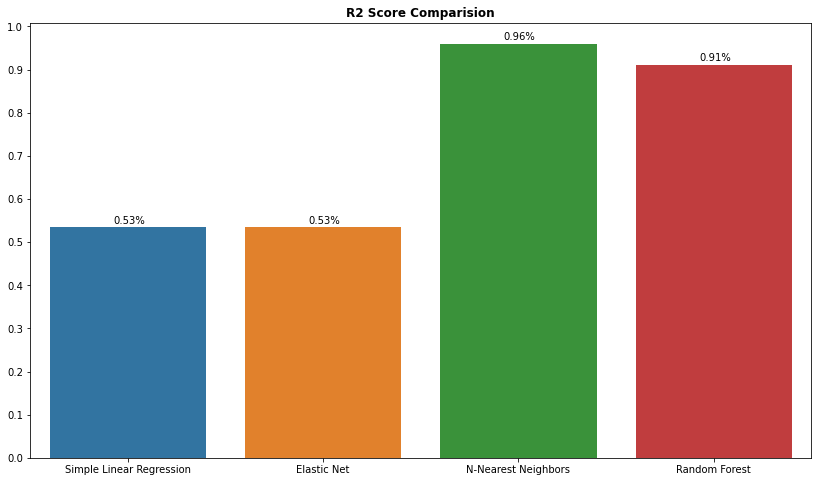

In [28]:
# Visulaizing the Results

plt.figure(figsize=(14,8))
ax = sns.barplot(x=Regr,y=r2)
plt.yticks(np.arange(0, 1.1, step=.1))
plt.title('R2 Score Comparision',fontweight='bold')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}%'.format(height), (x +0.325, y + height+0.0085))
plt.show()

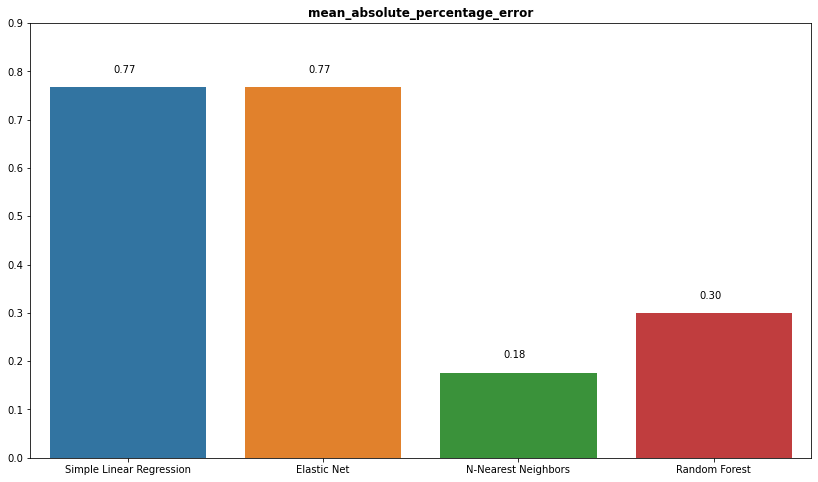

In [29]:
# Evaluating the Testing Errors
Test_Scores = np.array(results_df['Test Scores'])

plt.figure(figsize=(14,8))
ax = sns.barplot(x=Regr,y=PCT_ME)
plt.yticks(np.arange(0,1, step=0.1))
plt.title('mean_absolute_percentage_error',fontweight='bold')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}'.format(height), (x +0.325, y + height+0.03))
plt.show()


# Written Report
